In [1]:
%matplotlib inline
import numpy as np
from proj1_helpers import *
from implementations import *
from helpers import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

In [2]:
y, features, ids = load_csv_data('train.csv')
y_test , features_test, ids_test = load_csv_data('test.csv')

In [3]:
index_train = []
index_train.append(np.where((features[:,22] == 0) & (features [:,0] == -999)))
index_train.append(np.where((features[:,22] == 0) & (features [:,0] != -999)))

index_train.append(np.where((features[:,22] == 1) & (features [:,0] == -999)))
index_train.append(np.where((features[:,22] == 1) & (features [:,0] != -999)))

index_train.append(np.where(((features[:,22] == 2) | (features[:,22] == 3)) & (features [:,0] == -999)))
index_train.append(np.where(((features[:,22] == 2) | (features[:,22] == 3)) & (features [:,0] != -999)))

index_test = []
index_test.append(np.where((features_test[:,22] == 0) & (features_test[:,0] == -999)))
index_test.append(np.where((features_test[:,22] == 0) & (features_test[:,0] != -999)))

index_test.append(np.where((features_test[:,22] == 1) & (features_test[:,0] == -999)))
index_test.append(np.where((features_test[:,22] == 1) & (features_test[:,0] != -999)))

index_test.append(np.where(((features_test[:,22] == 2) | (features_test[:,22] == 3)) & (features_test[:,0] == -999)))
index_test.append(np.where(((features_test[:,22] == 2) | (features_test[:,22] == 3)) & (features_test[:,0] != -999)))


In [4]:
def create_dataset(dataset, y, index):
    jet0_nm = dataset[index[0]]
    y0_nm = y[index[0]]
    
    jet0_wm = dataset[index[1]]
    y0_wm = y[index[1]]
    
    jet1_nm = dataset[index[2]]
    y1_nm = y[index[2]]
    
    jet1_wm = dataset[index[3]]
    y1_wm = y[index[3]]
    
    jet2_nm = dataset[index[4]]
    y2_nm = y[index[4]]
    
    jet2_wm = dataset[index[5]]
    y2_wm = y[index[5]]
    
    
    jet0_nm = np.delete(jet0_nm, [0, 4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], 1)
    jet0_wm = np.delete(jet0_wm, [4, 5, 6, 12, 22, 23, 24, 25, 26, 27, 28, 29], 1)
    jet1_nm = np.delete(jet1_nm, [0, 4, 5, 6, 12, 22, 26, 27, 28], 1)
    jet1_wm = np.delete(jet1_wm, [4, 5, 6, 12, 22, 26, 27, 28], 1)
    jet2_nm = np.delete(jet2_nm, [0, 22], 1)
    jet2_wm = np.delete(jet2_wm, 22, 1)
    
    return [jet0_nm, jet0_wm, jet1_nm, jet1_wm, jet2_nm, jet2_wm], [y0_nm, y0_wm, y1_nm, y1_wm, y2_nm, y2_wm]

In [21]:
jets_datasets, y_datasets = create_dataset(features, y, index_train) 
jets_datasets_test, y_datasets_test = create_dataset(features_test, y_test, index_test)

[(26123, 17), (73790, 18), (7562, 21), (69982, 22), (4429, 28), (68114, 29)]


# Jet_0_NM

In [6]:
jet0_nm_train, mean0_nm, std0_nm = standardize(jets_datasets[0])
y0_nm_train = y_datasets[0]

jet0_nm_test = (jets_datasets_test[0] - mean0_nm) / std0_nm

y0_nm_test = y_datasets_test[0]


jet0_nm_train, mean0_nm, std0_nm = standardize(build_poly(jet0_nm_train, 2, False, False, True ))
jet0_nm_test = (build_poly(jet0_nm_test, 2, False, False, True) - mean0_nm) / std0_nm

jet0_nm_train = add_ones(jet0_nm_train)
jet0_nm_test = add_ones(jet0_nm_test)

0.410431838067 0.00316227766017
0.9492343032159264 6.81292069058e-05


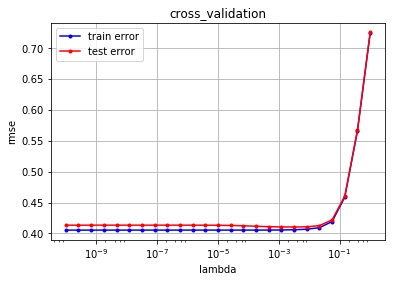

In [7]:
#cross_validation_demo(y0_nm_train, jet0_nm_train, np.logspace(-10,0,25), 11)

In [186]:
w0_nm, loss0_nm = ridge_regression(y0_nm_train, jet0_nm_train, 0.00316227766017)
y0_nm_predict = predict_labels(w0_nm, jet0_nm_test)

# Jet_0_WM

In [8]:
jet0_wm_train, mean0_wm, std0_wm = standardize(jets_datasets[1])
y0_wm_train = y_datasets[1]


jet0_wm_train = add_features_jet0(jet0_wm_train)
#jet0_wm_train = np.concatenate((jet0_wm_train, compute_inverse_log(jet0_wm_train, [3, 5, 8, 18])), 1)

jet0_wm_test = (jets_datasets_test[1] - mean0_wm) / std0_wm
y0_wm_test = y_datasets_test[1]

jet0_wm_test = add_features_jet0(jet0_wm_test)
#jet0_wm_test = np.concatenate((jet0_wm_test, compute_inverse_log(jet0_wm_test, [3, 5, 8, 18])), 1)

jet0_wm_train, mean0_wm, std0_wm = standardize(build_poly(jet0_wm_train, 3, True, False, True))
jet0_wm_test = (build_poly(jet0_wm_test, 3, True, False, True) - mean0_wm) / std0_wm

jet0_wm_train = add_ones(jet0_wm_train)
jet0_wm_test = add_ones(jet0_wm_test)

(73790, 1)
(168195, 1)


0.735482378855 0.000268269579528
0.8112481366038757 2.68269579528e-09


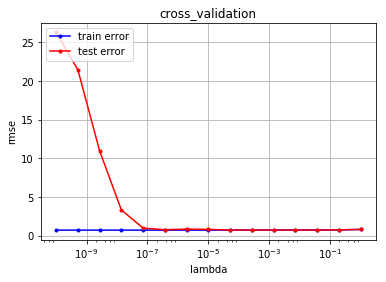

In [9]:
#cross_validation_demo(y0_wm_train, jet0_wm_train, np.logspace(-10,0,15))

In [189]:
w0_wm, loss0_wm = ridge_regression(y0_wm_train, jet0_wm_train, 0.000268269579528)
y0_wm_predict = predict_labels(w0_wm, jet0_wm_test)

# Jet_1_NM

In [10]:
jet1_nm_train, mean1_nm, std1_nm = standardize(jets_datasets[2])
y1_nm_train = y_datasets[2]

jet1_nm_test = (jets_datasets_test[2] - mean1_nm) / std1_nm
y1_nm_test = y_datasets_test[2]

jet1_nm_train, mean1_nm, std1_nm = standardize(build_poly(jet1_nm_train, 2, False, False, True))
jet1_nm_test = (build_poly(jet1_nm_test, 2, False, False, True) - mean1_nm) / std1_nm



jet1_nm_train = add_ones(jet1_nm_train)
jet1_nm_test = add_ones(jet1_nm_test)

0.514851467665 0.0177827941004
0.9202380952380953 0.0177827941004


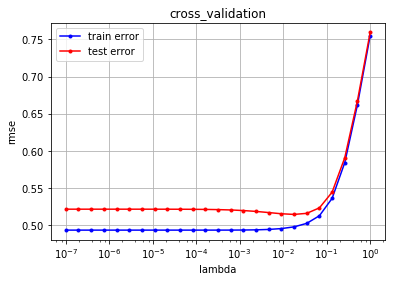

In [11]:
#cross_validation_demo(y1_nm_train, jet1_nm_train, np.logspace(-7,0,25), 11)

In [192]:
w1_nm, loss1_nm = ridge_regression(y1_nm_train, jet1_nm_train, 0.0177827941004)
y1_nm_predict = predict_labels(w1_nm, jet1_nm_test)

# Jet_1_WM

In [12]:
jet1_wm_train, mean1_wm, std1_wm = standardize(jets_datasets[3])
y1_wm_train = y_datasets[3]



jet1_wm_test = (jets_datasets_test[3] - mean1_wm) / std1_wm
y1_wm_test = y_datasets_test[3]


jet1_wm_train, mean1_wm, std1_wm = standardize(build_poly(jet1_wm_train, 4, True, False, True))
jet1_wm_test = (build_poly(jet1_wm_test, 4, True, False, True) - mean1_wm) / std1_wm

jet1_wm_train = add_ones(jet1_wm_train)
jet1_wm_test = add_ones(jet1_wm_test)

0.771479860997 0.000695192796178
0.7962703629608459 1e-10


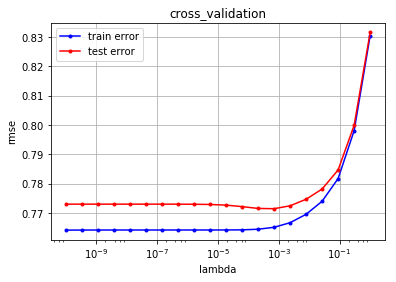

In [13]:
#cross_validation_demo(y1_wm_train, jet1_wm_train, np.logspace(-10,0,20), 11)

In [195]:
w1_wm, loss1_wm = ridge_regression(y1_wm_train, jet1_wm_train, 0.000695192796178)
y1_wm_predict = predict_labels(w1_wm, jet1_wm_test)

# Jet_2_NM

In [14]:
jet2_nm_train, mean2_nm, std2_nm = standardize(jets_datasets[4])
y2_nm_train = y_datasets[4]


jet2_nm_test = (jets_datasets_test[4] - mean2_nm) / std2_nm
y2_nm_test = y_datasets_test[4]


jet2_nm_train, mean2_nm, std2_nm = standardize(build_poly(jet2_nm_train, 2, False, False, True))
jet2_nm_test = (build_poly(jet2_nm_test, 2, False, False, True ) - mean2_nm) / std2_nm

jet2_nm_train = add_ones(jet2_nm_train)
jet2_nm_test = add_ones(jet2_nm_test)

0.538384419199 0.0215443469003
0.9125423728813559 0.146779926762


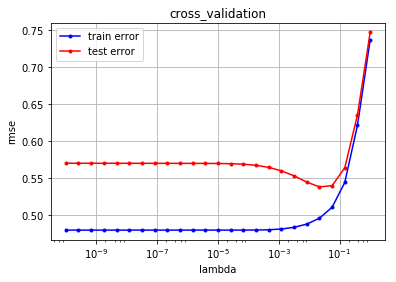

In [15]:
#cross_validation_demo(y2_nm_train, jet2_nm_train, np.logspace(-10,0,25), 11)

In [198]:
w2_nm, loss2_nm = ridge_regression(y2_nm_train, jet2_nm_train, 0.0215443469003)
y2_nm_predict = predict_labels(w2_nm, jet2_nm_test)

# Jet_2_WM

In [16]:
jet2_wm_train, mean2_wm, std2_wm = standardize(jets_datasets[5])
y2_wm_train = y_datasets[5]

jet2_wm_test = (jets_datasets_test[5] - mean2_wm) / std2_wm
y2_wm_test = y_datasets_test[5]





jet2_wm_train, mean2_wm, std2_wm = standardize(build_poly(jet2_wm_train, 3, True, True, True))
jet2_wm_test = (build_poly(jet2_wm_test, 3, True, True, True) - mean2_wm) / std2_wm


jet2_wm_train = add_ones(jet2_wm_train)
print(jet2_wm_train.shape)
jet2_wm_test = add_ones(jet2_wm_test)

(68114, 1306)


0.716706338873 0.00138949549437
0.8348700631331669 5.17947467923e-05


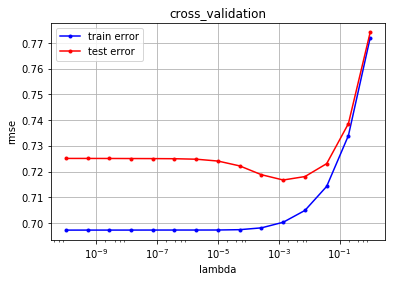

In [17]:
#cross_validation_demo(y2_wm_train, jet2_wm_train, np.logspace(-10,0,15), 11)

In [201]:
w2_wm, loss_wn = ridge_regression(y2_wm_train, jet2_wm_train, 0.00138949549437)
y2_wm_predict = predict_labels(w2_wm, jet2_wm_test)

In [202]:
y_predict = y_predict = np.zeros(len(y_test))
y_predict[index_test[0]] = y0_nm_predict
y_predict[index_test[1]] = y0_wm_predict
y_predict[index_test[2]] = y1_nm_predict
y_predict[index_test[3]] = y1_wm_predict
y_predict[index_test[4]] = y2_nm_predict
y_predict[index_test[5]] = y2_wm_predict

create_csv_submission(ids_test, y_predict, 'prediction.csv')